In [348]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)


### <span style="color:green">Descriptive Statistics</span> 


In [349]:
df_raw = pd.read_csv('DF_Raw_Data.csv')
df_stdev = pd.read_csv('DF_Rolling_Stdev.csv')
print(df_raw.describe())
print(df_stdev.describe())
print(df_raw.head())

       Volumetric Flow Meter 1  Volumetric Flow Meter 2  Pump Speed (RPM)  \
count              2453.000000              2453.000000       2453.000000   
mean                 41.802629                41.796702         90.796576   
std                   3.656576                 3.654873         10.217885   
min                   0.000000                 0.000000          0.000000   
25%                  41.050000                41.000000         85.000000   
50%                  42.100000                42.140000         91.000000   
75%                  43.140000                43.130000         97.000000   
max                  45.900000                45.840000        124.000000   

       Pump Torque   Ambient Temperature  Horse Power  Pump Efficiency  \
count   2453.000000          2453.000000  2453.000000      2453.000000   
mean     202.851610            50.226661     3.540897        76.015149   
std       22.683977             5.298203     0.579055         6.651633   
min       

### <span style="color:green">Creating a Boxplot</span> 

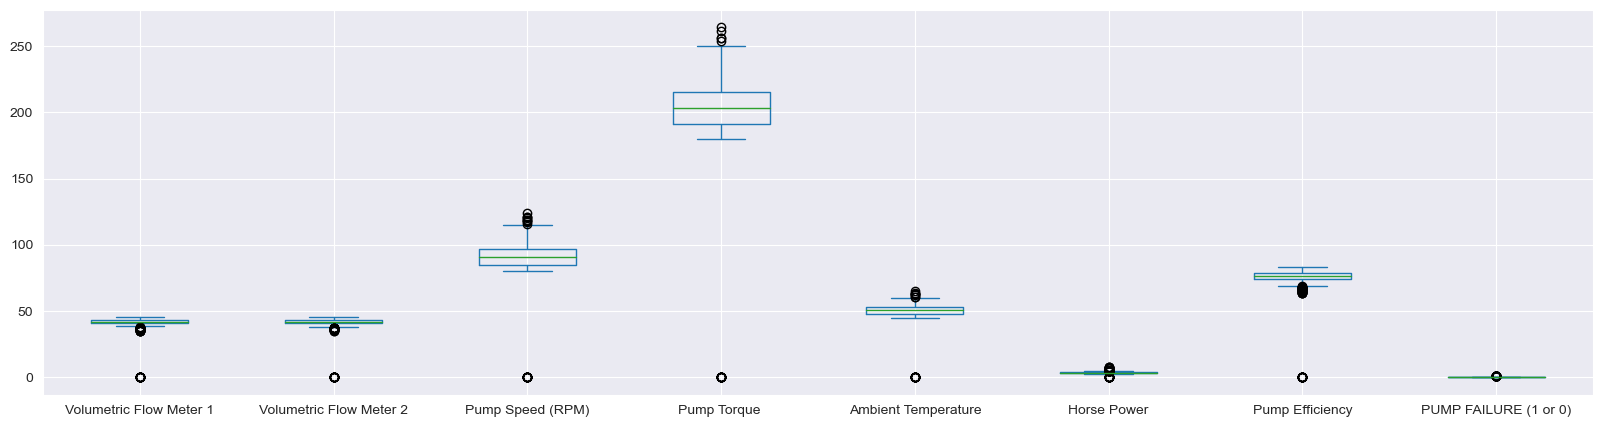

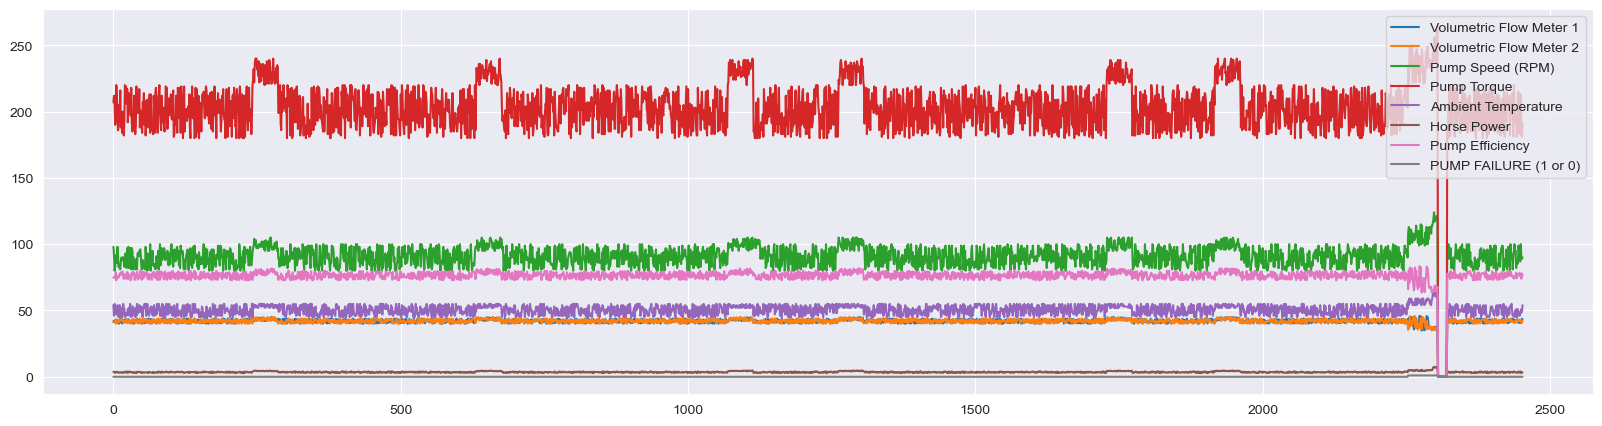

<AxesSubplot:>

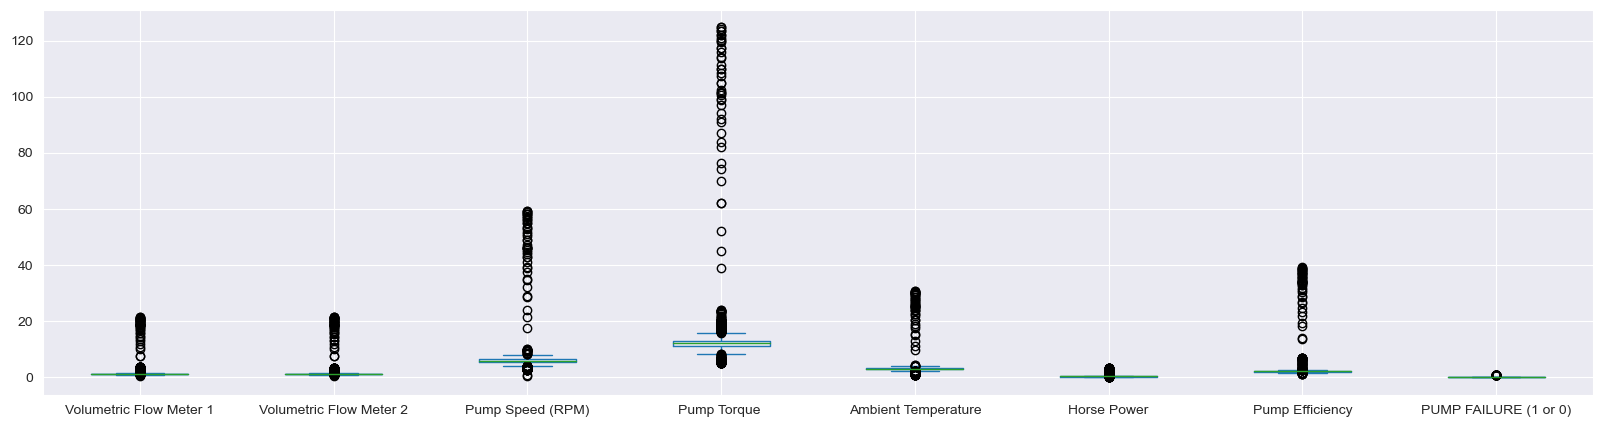

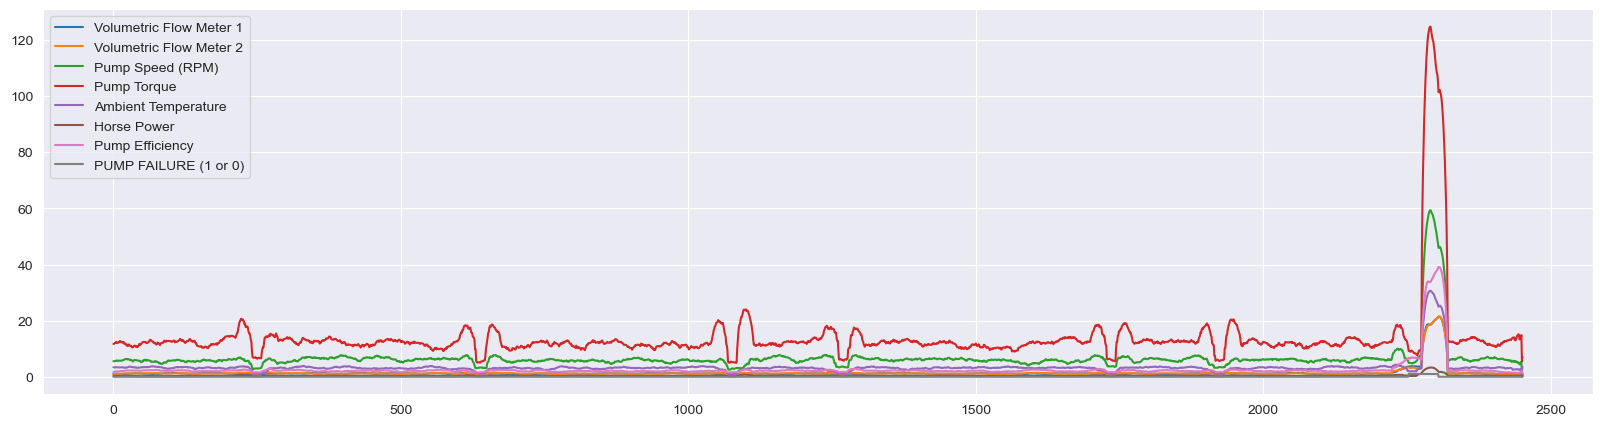

In [351]:
df_raw.plot(kind='box')
df_raw.plot(kind='line')
plt.show()

df_stdev.plot(kind='box')
df_stdev.plot(kind='line')

### <span style="color:green">Filtered DataFrames with Box Plots</span> 

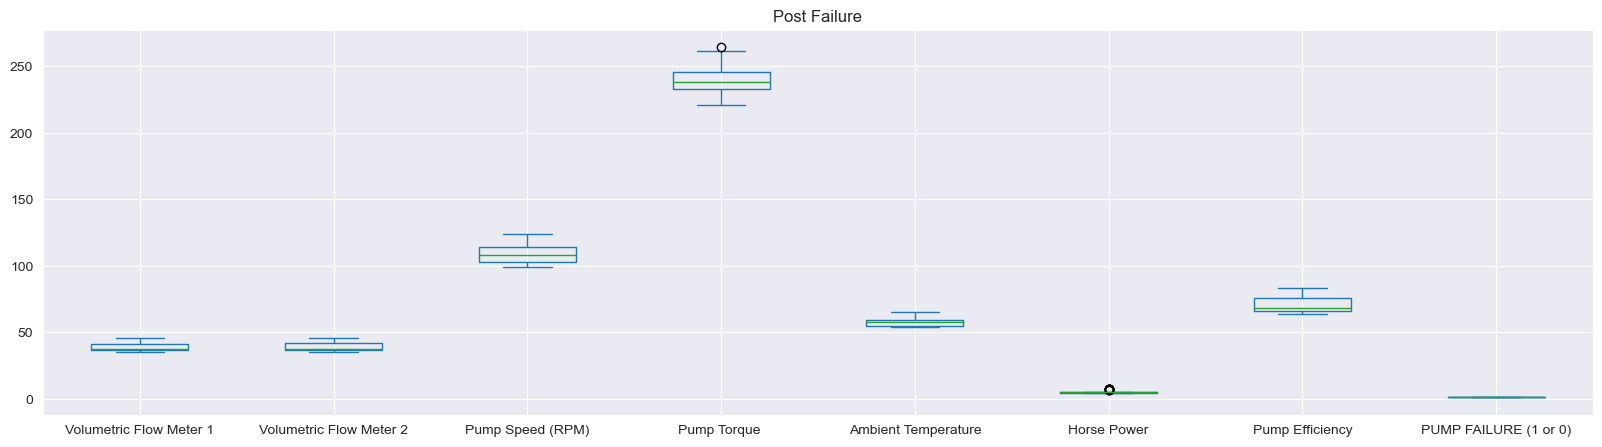

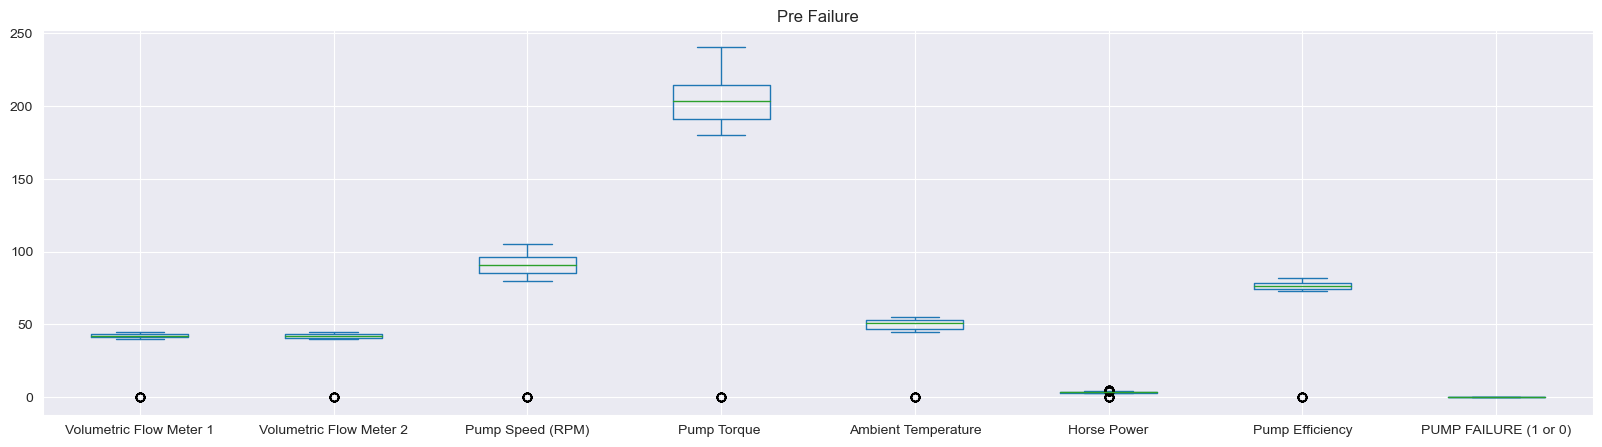

In [353]:
post_failure = df_raw['PUMP FAILURE (1 or 0)'] == 1
df_post = df_raw[post_failure]
df_post.plot(kind= 'box')
plt.title('Post Failure')
plt.show()

pre_failure = df_raw['PUMP FAILURE (1 or 0)'] == 0
df_pre = df_raw[pre_failure]
df_pre.plot(kind='box')
plt.title('Pre Failure')
plt.show()

### <span style="color:green">Creating Quartiles</span> 

In [355]:
Q1 = df_raw.quantile(.25)
Q3 = df_raw.quantile(.75)
IQR = Q3 - Q1
print(IQR)

Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64


### <span style="color:green">Identifying Outliers</span> 

In [356]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
outliers = df_raw[((df_raw < lower_limit) | ((df_raw > upper_limit))).any(axis=1)]
new_df = df_raw.count() - outliers.count()
pct_df = (new_df / df_raw.count()) * 100
print(pct_df)

Data Source                96.127191
TIMEFRAME (DD/MM/YYYY)     96.127191
Volumetric Flow Meter 1    96.127191
Volumetric Flow Meter 2    96.127191
Pump Speed (RPM)           96.127191
Pump Torque                96.127191
Ambient Temperature        96.127191
Horse Power                96.127191
Pump Efficiency            96.127191
PUMP FAILURE (1 or 0)      96.127191
dtype: float64


C:\Users\dillo\AppData\Local\Temp\ipykernel_9624\3221499298.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df_raw[((df_raw < lower_limit) | ((df_raw > upper_limit))).any(axis=1)]


### <span style="color:green">Creating a box plot without outliers</span> 

C:\Users\dillo\AppData\Local\Temp\ipykernel_9624\1453766027.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  no_outliers = df_raw[~((df_raw < lower_limit) | ((df_raw > upper_limit))).any(axis=1)]


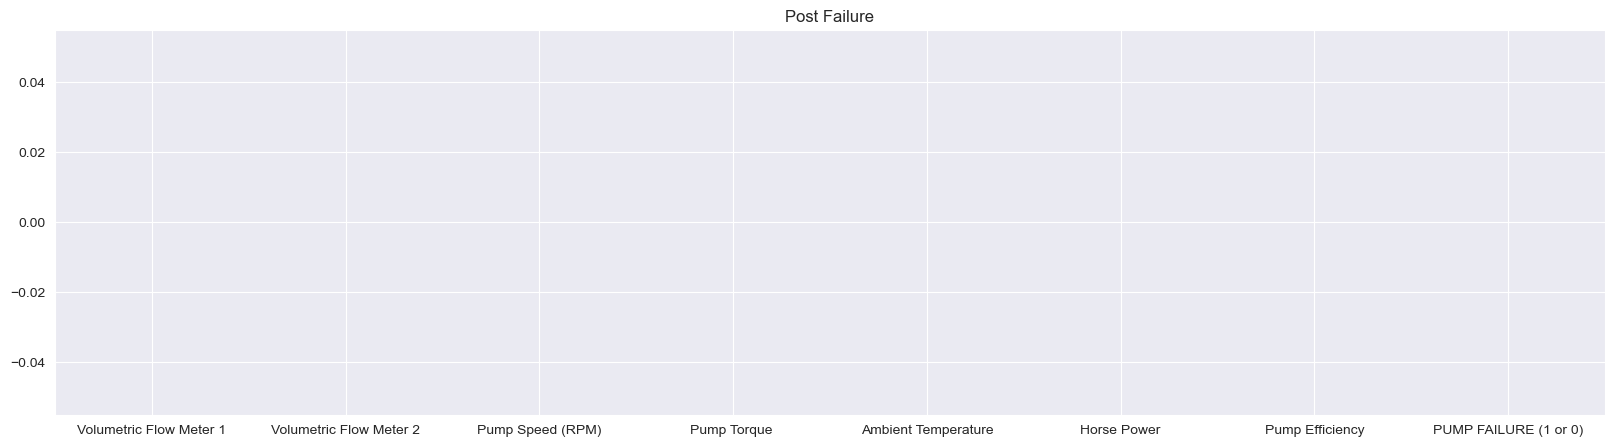

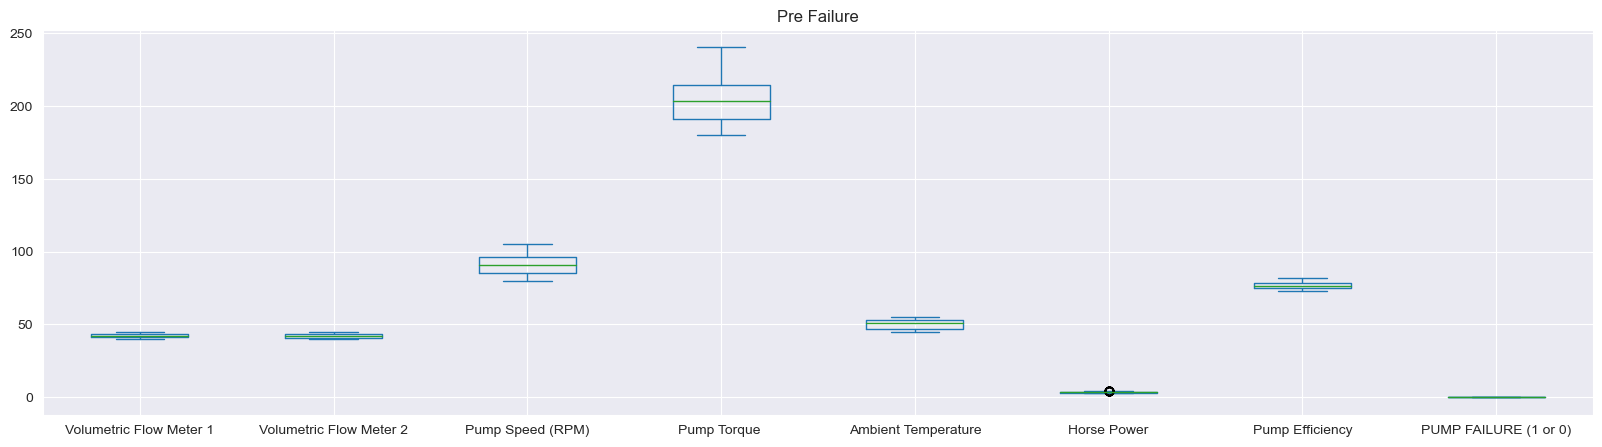

In [358]:
no_outliers = df_raw[~((df_raw < lower_limit) | ((df_raw > upper_limit))).any(axis=1)]

post_failure = no_outliers['PUMP FAILURE (1 or 0)'] == 1
df_post = no_outliers[post_failure]
df_post.plot(kind= 'box')
plt.title('Post Failure')
plt.show()

pre_failure = no_outliers['PUMP FAILURE (1 or 0)'] == 0
df_pre = no_outliers[pre_failure]
df_pre.plot(kind='box')
plt.title('Pre Failure')
plt.show()

### <span style="color:green">Plotting and Examine Each Column</span> 

In [360]:
df_raw.set_index(['TIMEFRAME (DD/MM/YYYY)'],inplace=True)

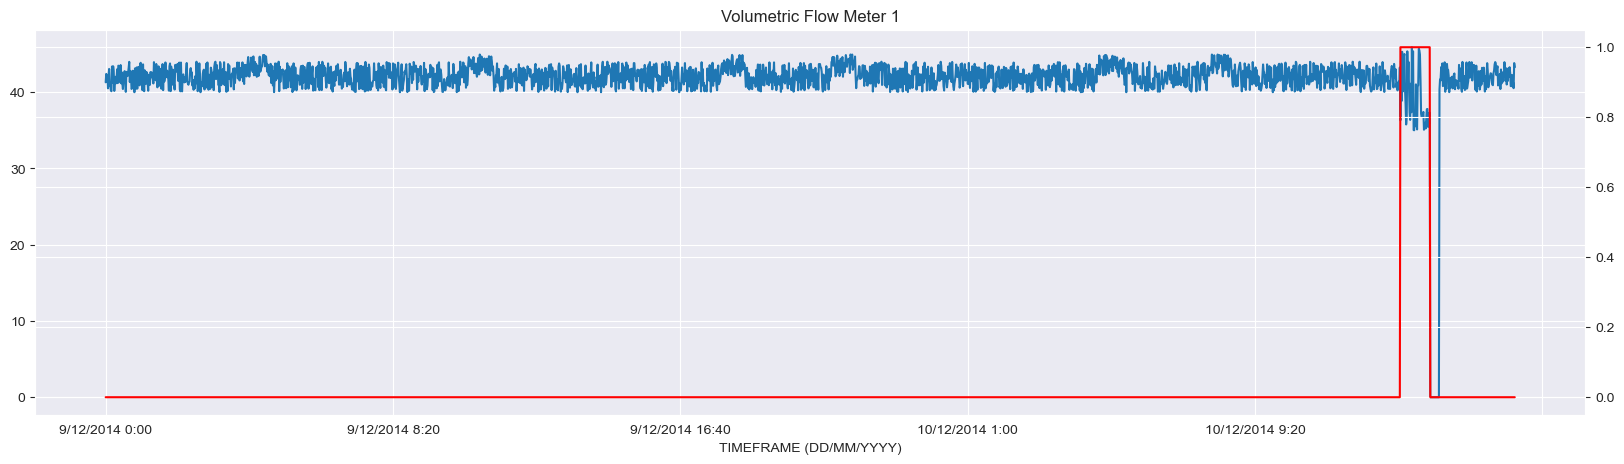

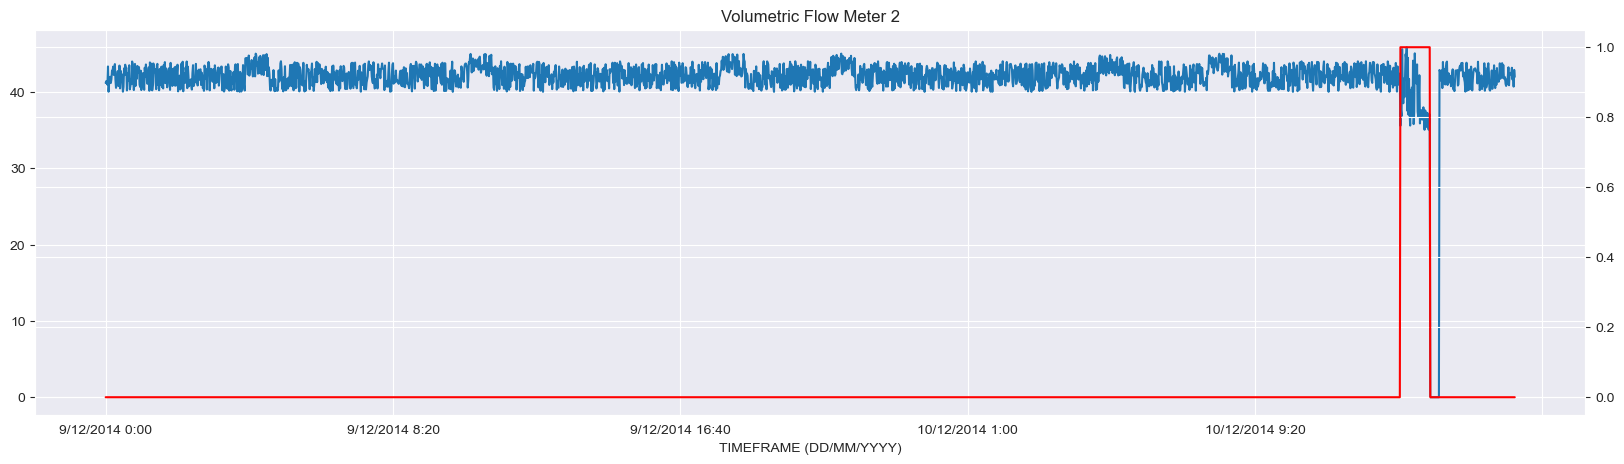

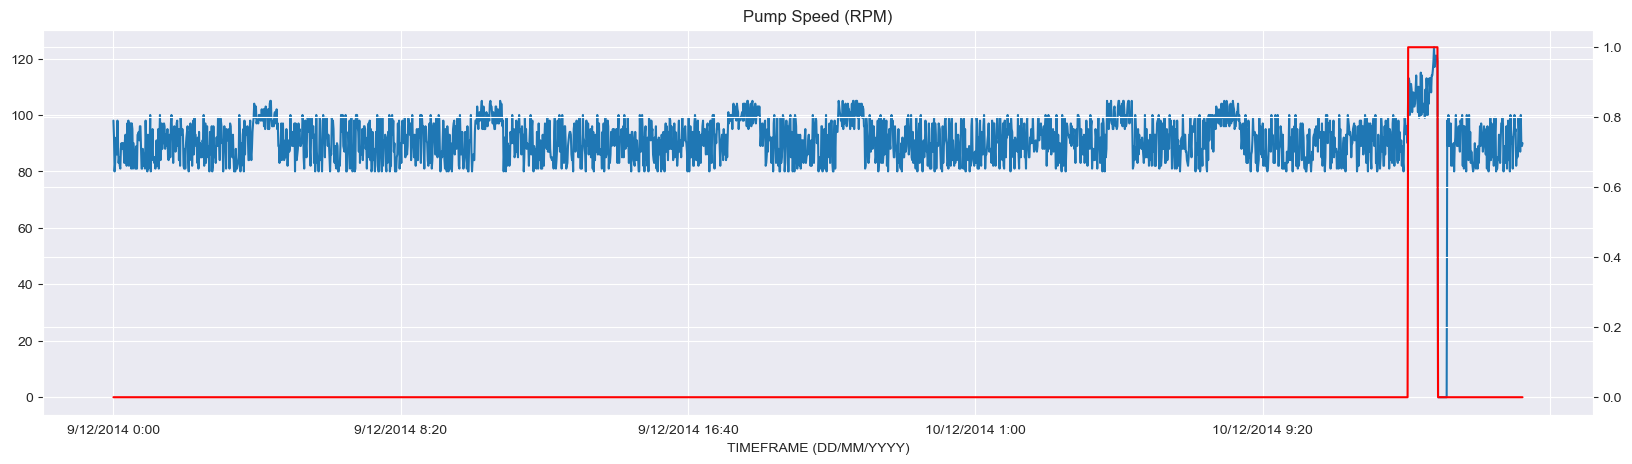

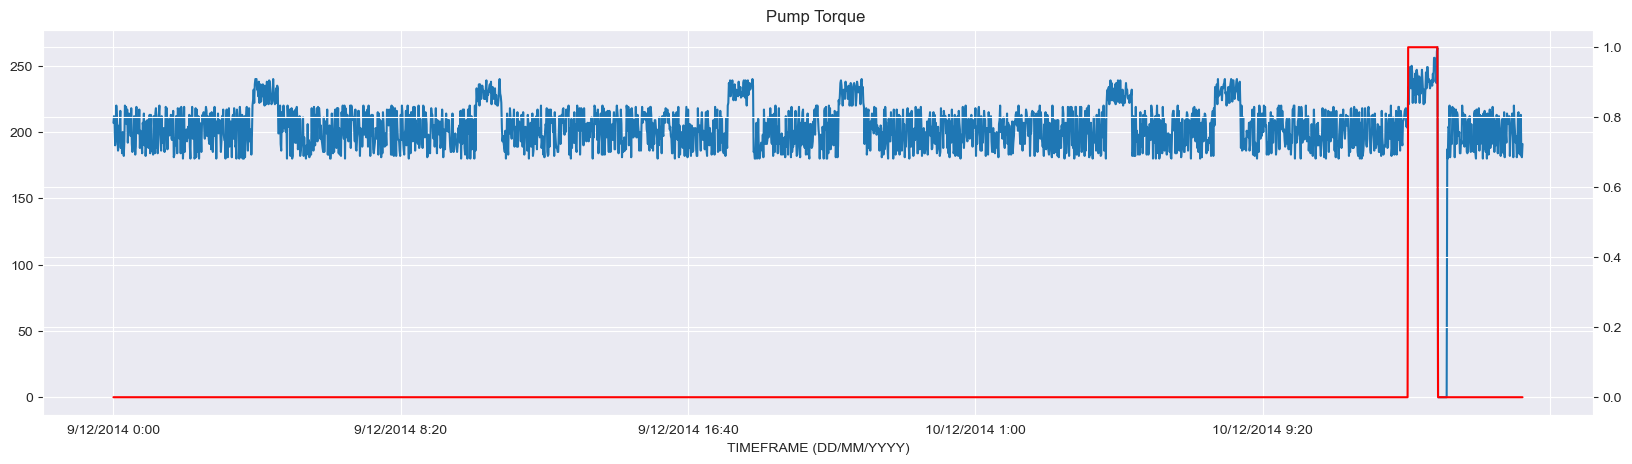

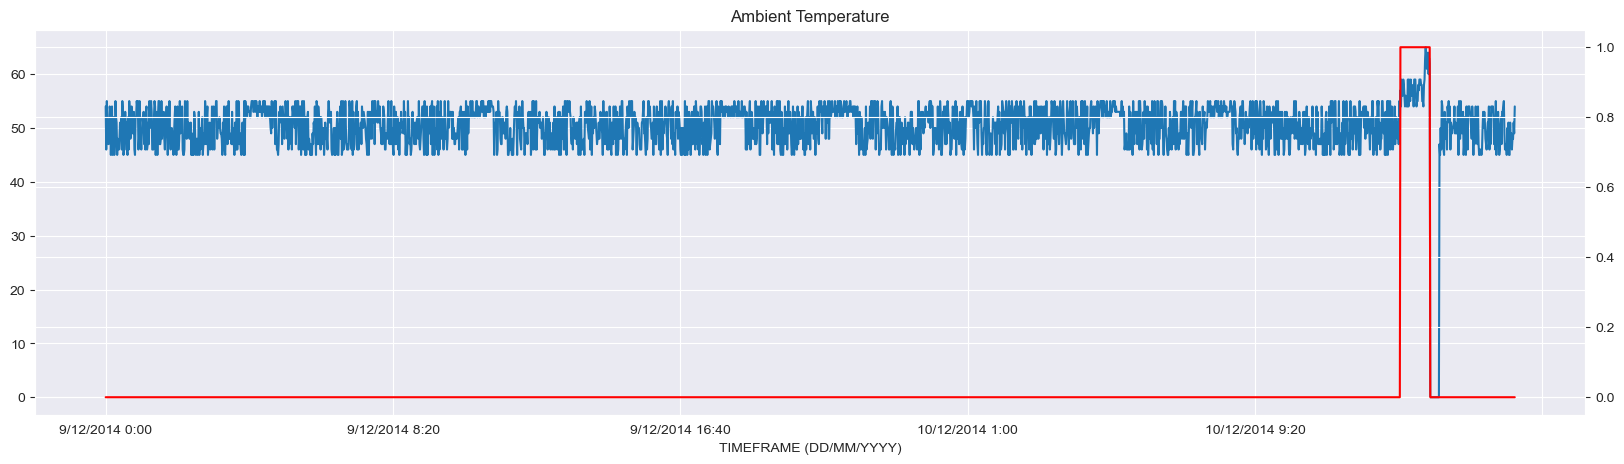

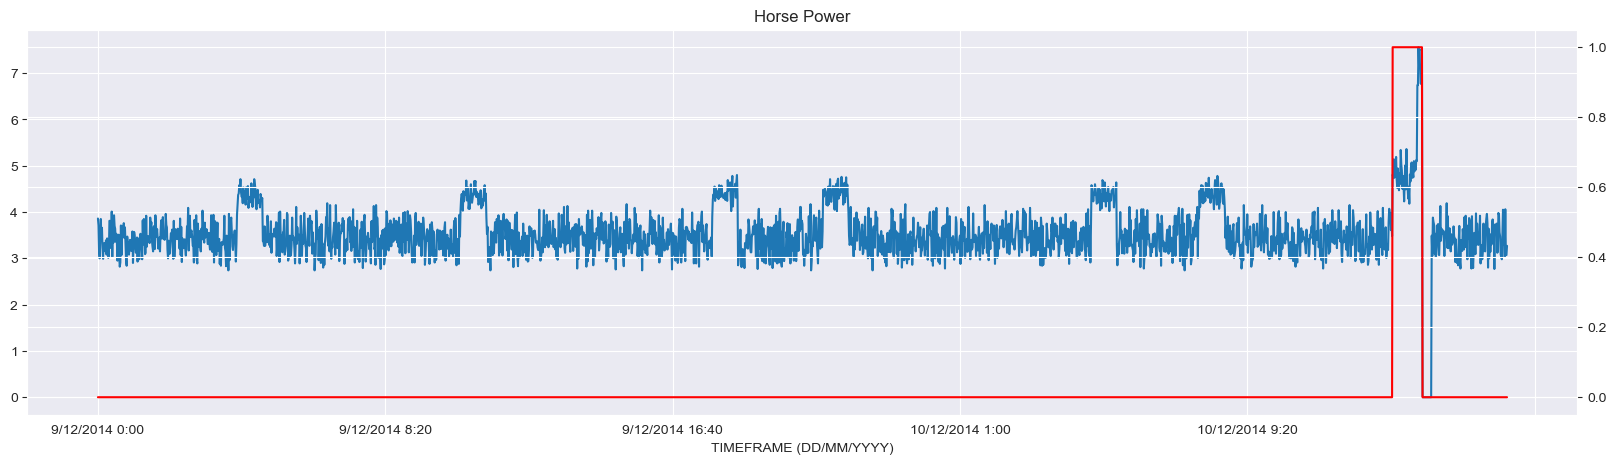

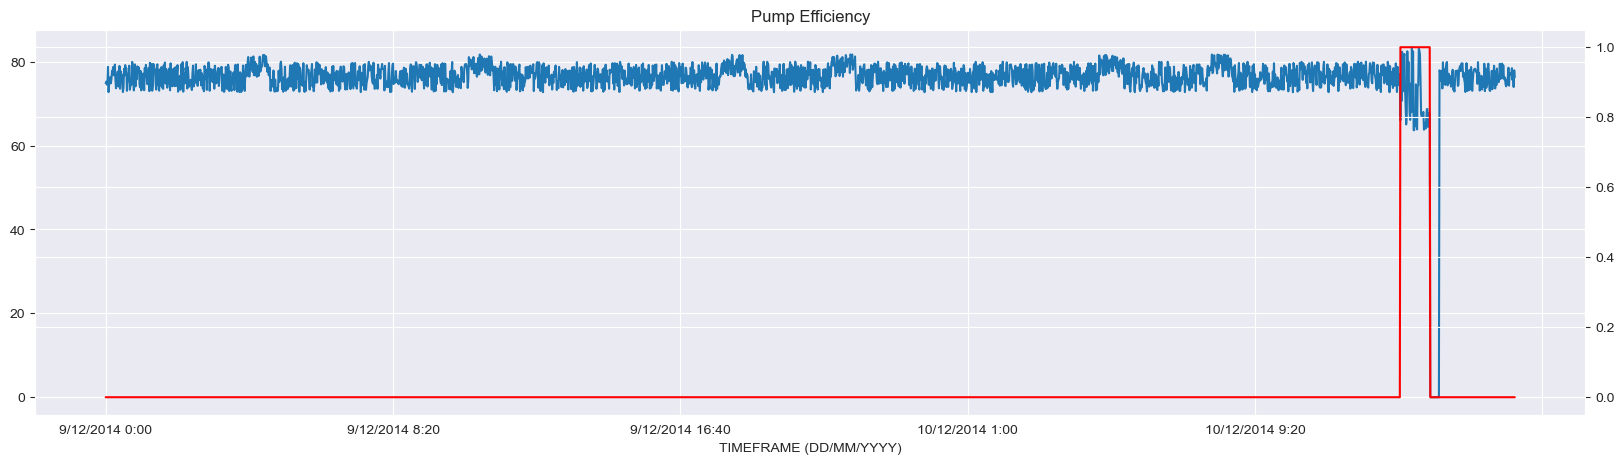

In [361]:
listofvariables = ['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2','Pump Speed (RPM)','Pump Torque ','Ambient Temperature','Horse Power','Pump Efficiency']
for item in listofvariables:
    ax1 = df_raw[item].plot(kind='line')
    ax2 = ax1.twinx()
    ax2.plot(df_raw['PUMP FAILURE (1 or 0)'],color='red')
    plt.title(item)
    plt.show()

### <span style="color:green">Creating a Plot for Pump Failures Over a Rolling Time Period</span> 

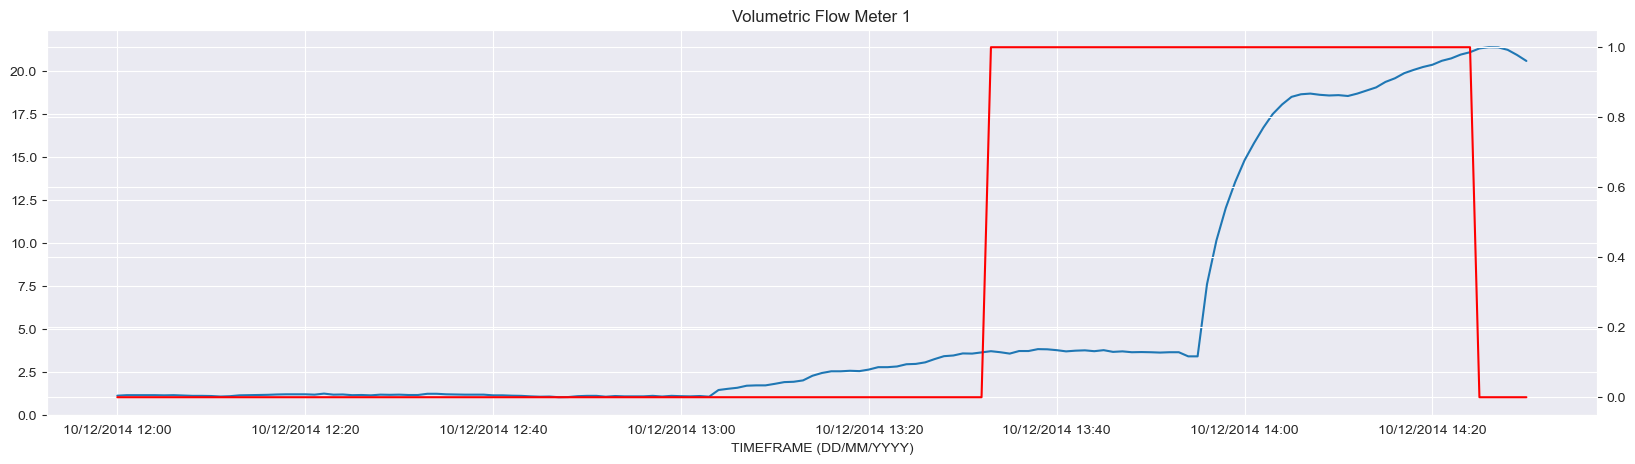

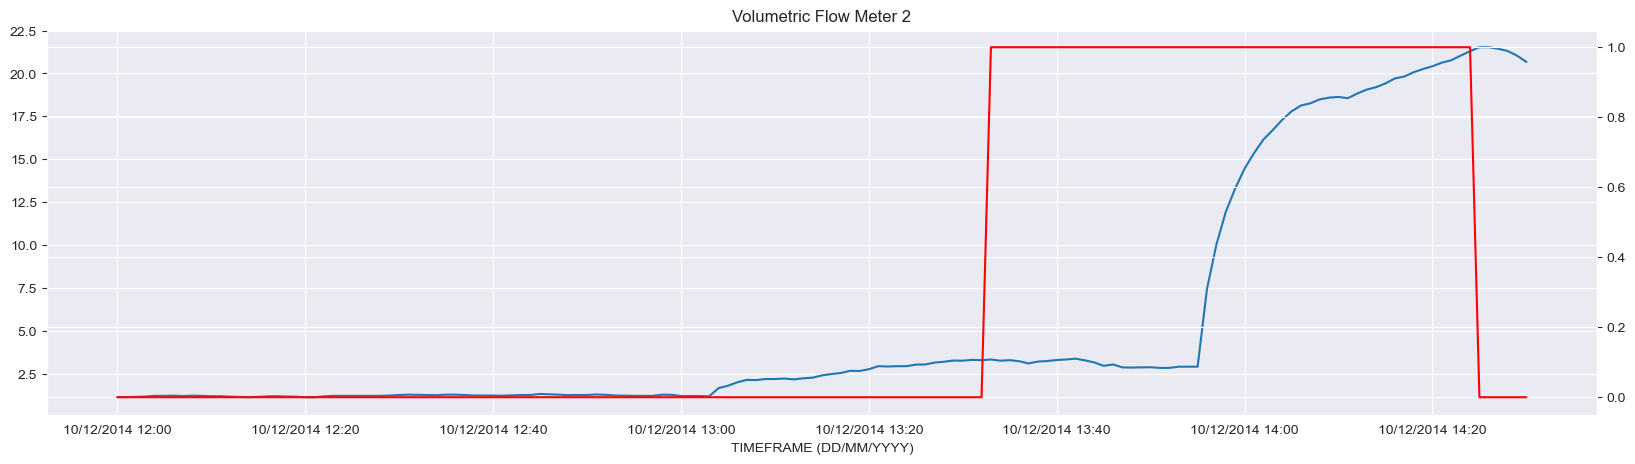

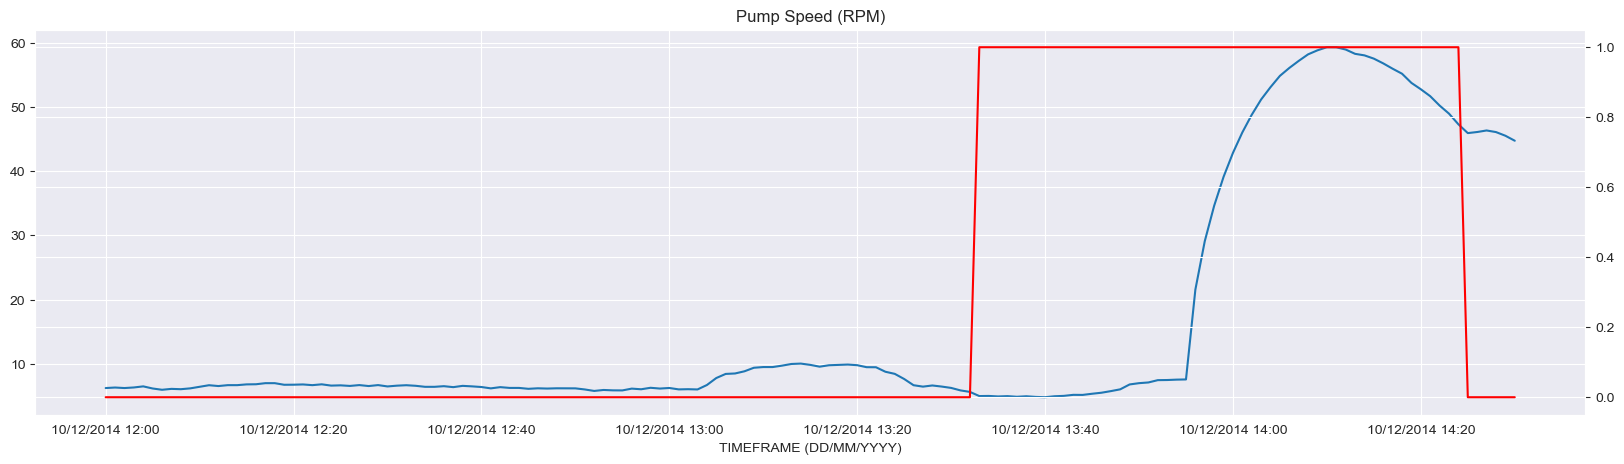

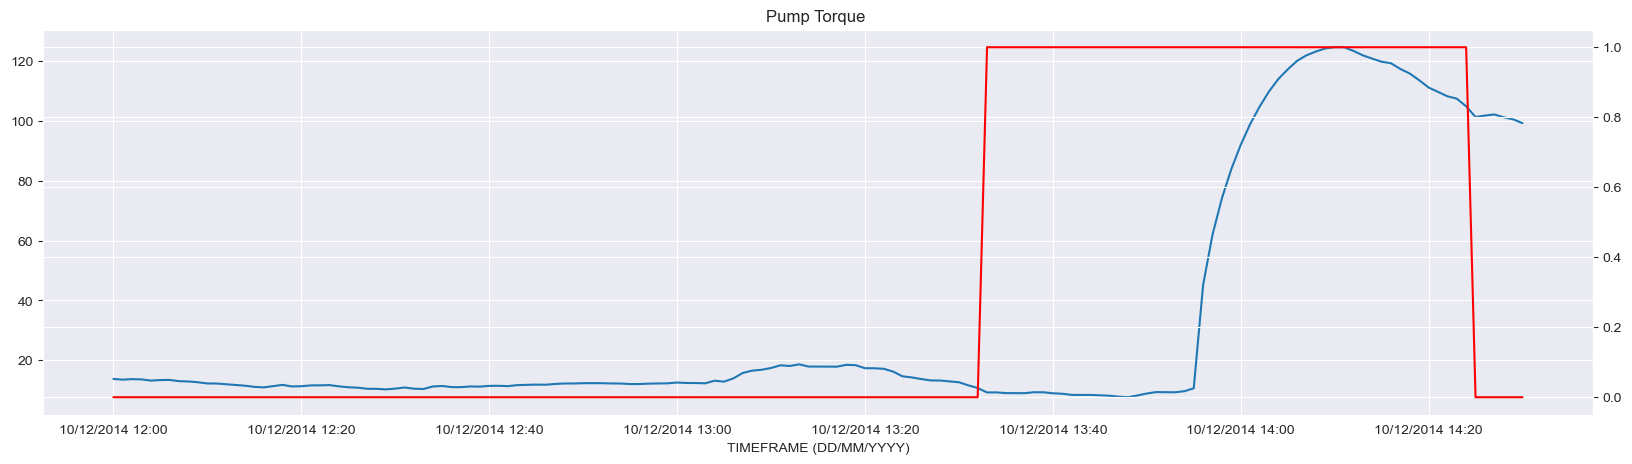

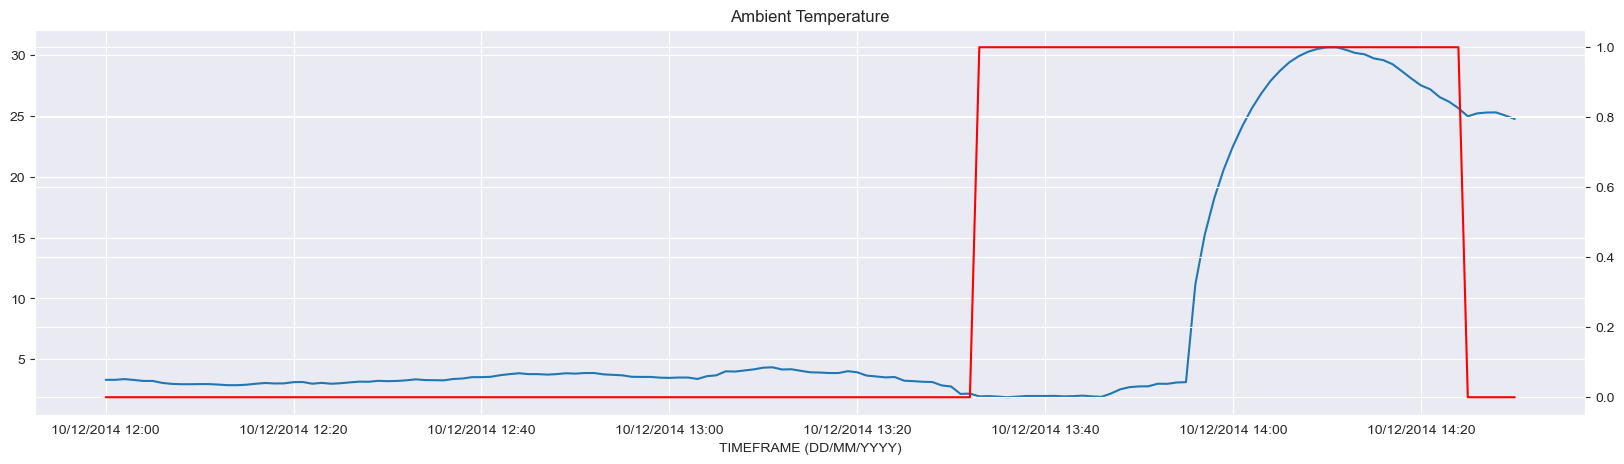

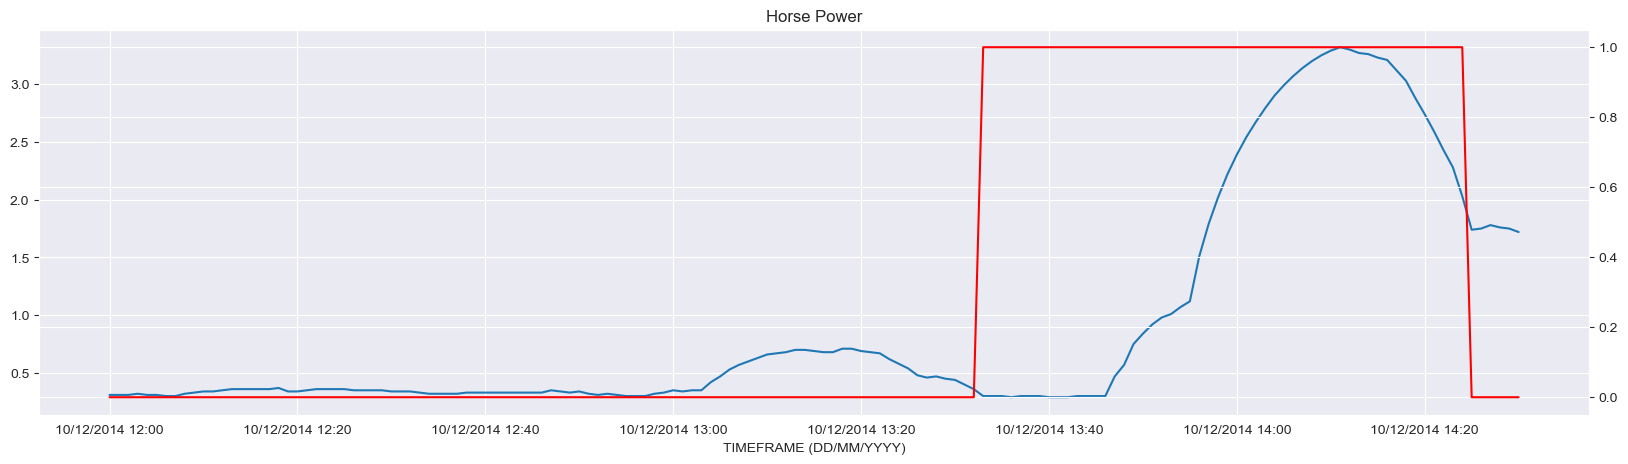

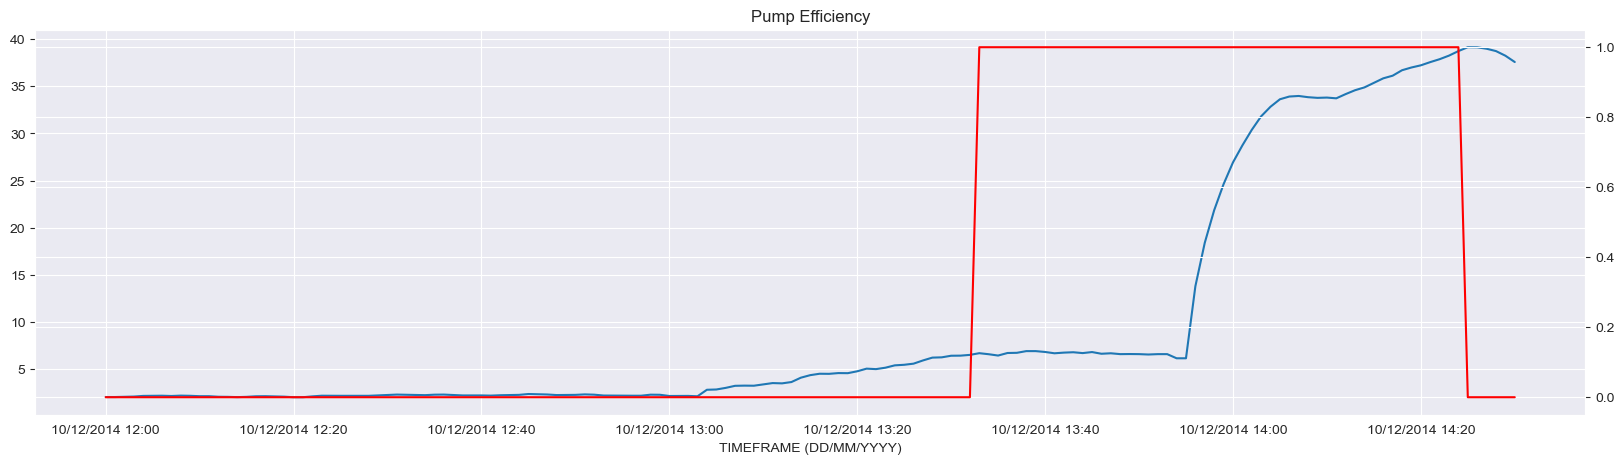

In [363]:
df_stdev = pd.read_csv('DF_Rolling_Stdev.csv')
df_stdev_i = df_stdev.set_index('TIMEFRAME (DD/MM/YYYY)')
df_stdev_filt = df_stdev_i[(df_stdev_i.index >= '10/12/2014 12:00') & (df_stdev_i.index <= '10/12/2014 14:30')]

listofvariables = ['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2','Pump Speed (RPM)','Pump Torque ','Ambient Temperature','Horse Power','Pump Efficiency']
for item in listofvariables:
    ax1 = df_stdev_filt[item].plot()
    ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax2 = ax1.twinx()
    ax2.plot(df_stdev_filt['PUMP FAILURE (1 or 0)'],color= 'red')
    ax2.xaxis.set_major_locator(plt.MaxNLocator(10))
    plt.title(item)
    plt.show()

## <span style="color:blue">Inferential Statistical Analysis</span>

### <span style="color:purple">Creating a Heatmap</span> 

<AxesSubplot:>

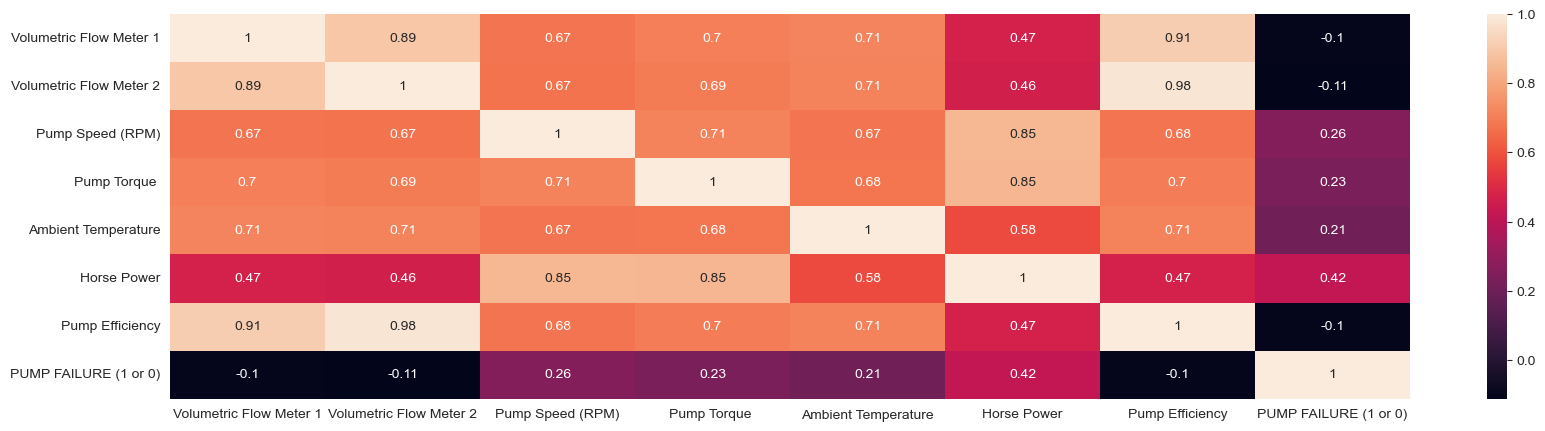

In [364]:
df_corr_raw = df_raw.corr()
sns.heatmap(df_corr_raw,annot=True)


### <span style="color:purple">Creating a Barplot of Correlated Features</span>

<AxesSubplot:>

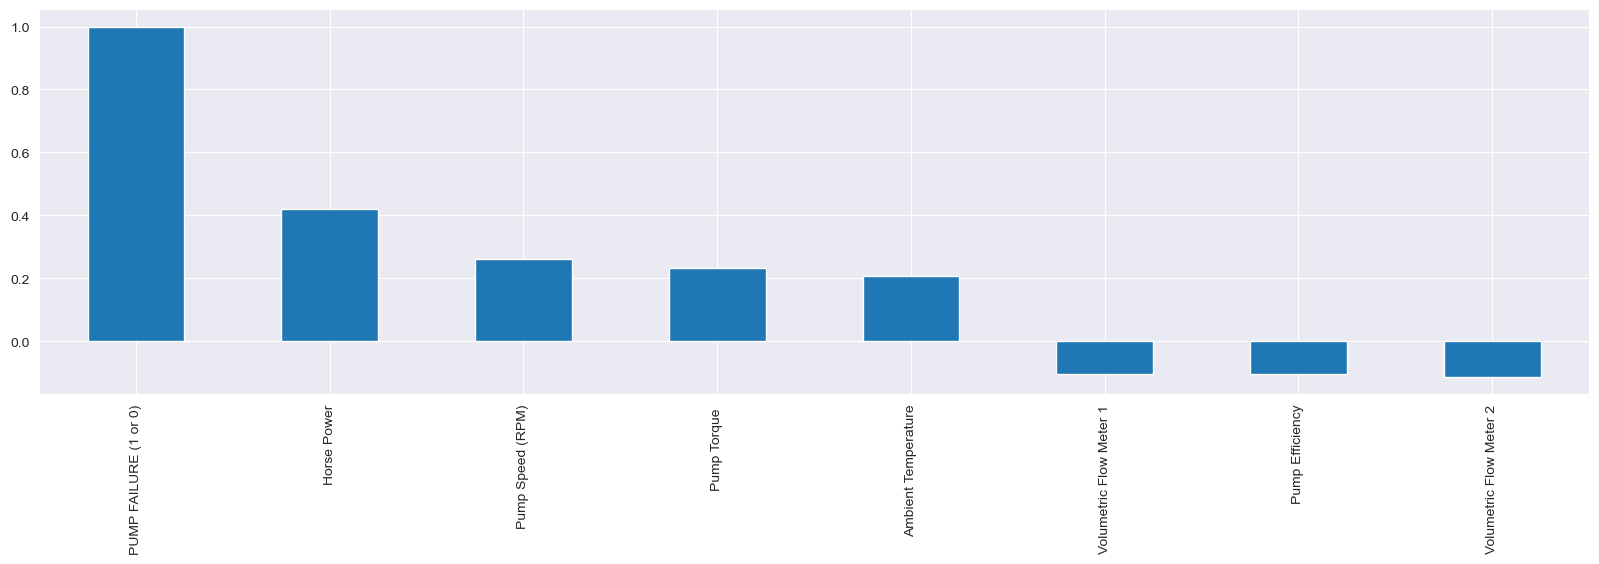

In [366]:
df_corr_raw['PUMP FAILURE (1 or 0)'].sort_values(ascending=False).plot(kind='bar')

### <span style="color:purple">Creating a Rolling Standard Deviation Heatmap</span> 

<AxesSubplot:>

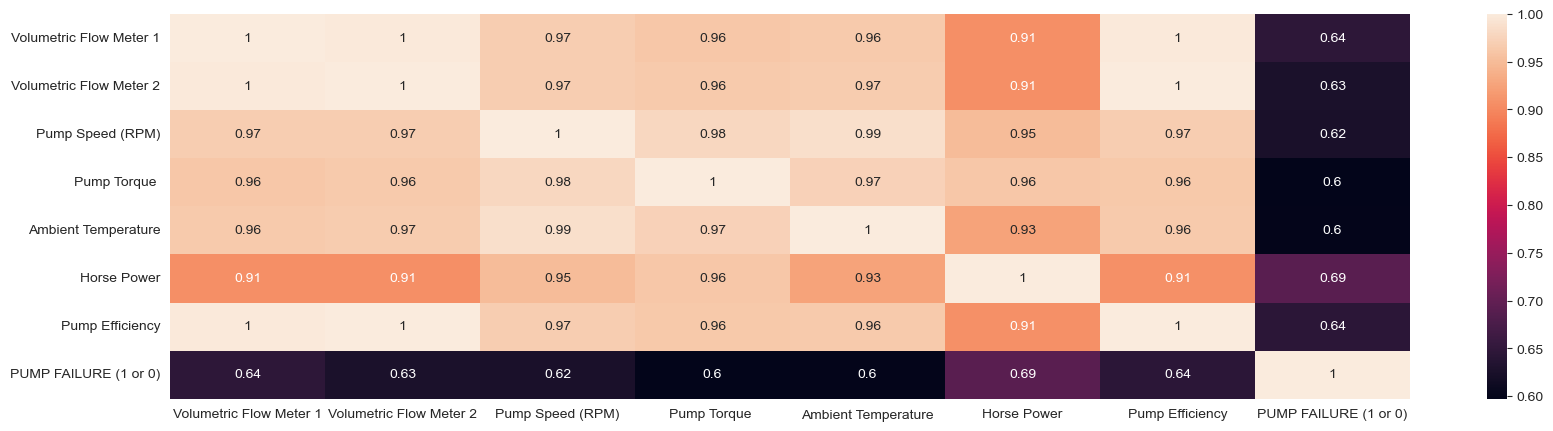

In [367]:
df_corr_stdev = df_stdev.corr()
sns.heatmap(df_corr_stdev,annot=True)

### Creating a Multivariate Regression Model


### <span style="color:purple">Using OLS Regression</span> 

In [369]:
#Dataframe_Raw
df_raw = pd.read_csv('DF_Raw_Data.csv')

exp_variables = ['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2','Pump Speed (RPM)','Pump Torque ',
                 'Ambient Temperature','Horse Power','Pump Efficiency']
ind_variables = df_raw[exp_variables]
dep_variable = df_raw['PUMP FAILURE (1 or 0)']


ind_variables = sm.add_constant(ind_variables)


regression_model = sm.OLS(dep_variable,ind_variables).fit()


print(regression_model.summary())

                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.362
Model:                               OLS   Adj. R-squared:                  0.360
Method:                    Least Squares   F-statistic:                     197.9
Date:                   Wed, 22 Feb 2023   Prob (F-statistic):          5.58e-233
Time:                           13:36:23   Log-Likelihood:                 1823.0
No. Observations:                   2453   AIC:                            -3630.
Df Residuals:                       2445   BIC:                            -3583.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [370]:
#Dataframe_Stdev
df_stdev = pd.read_csv('DF_Rolling_Stdev.csv')

exp_variables = ['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2','Pump Speed (RPM)','Pump Torque ',
                 'Ambient Temperature','Horse Power','Pump Efficiency']
ind_variables = df_stdev[exp_variables]
dep_variable = df_stdev['PUMP FAILURE (1 or 0)']


ind_variables = sm.add_constant(ind_variables)


regression_model = sm.OLS(dep_variable,ind_variables).fit()


print(regression_model.summary())

                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.778
Model:                               OLS   Adj. R-squared:                  0.778
Method:                    Least Squares   F-statistic:                     1225.
Date:                   Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                           13:36:23   Log-Likelihood:                 3117.4
No. Observations:                   2452   AIC:                            -6219.
Df Residuals:                       2444   BIC:                            -6172.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

### <span style="color:purple">Analysis of Coefficients </span>

<AxesSubplot:>

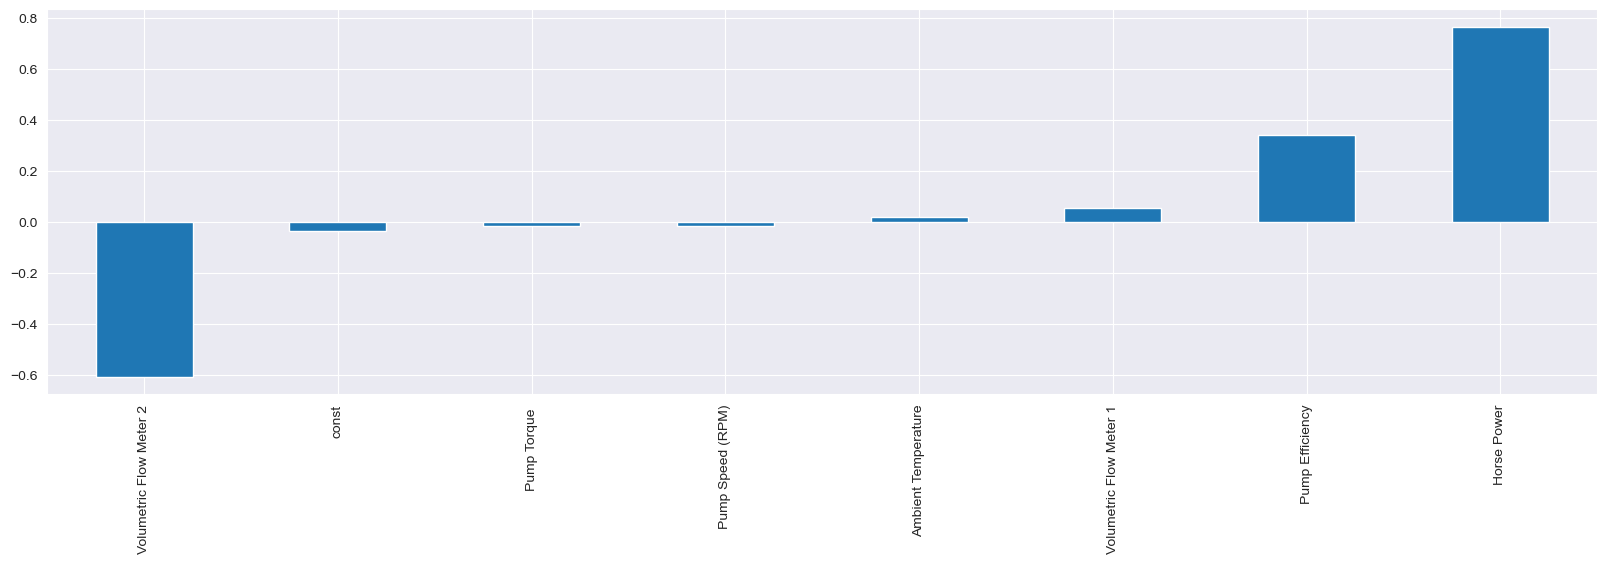

In [375]:
regression_model.params.sort_values(ascending=True).plot(kind='bar')


### <span style="color:purple">Validating Predictions</span> 

In [66]:
df_stdev = df_stdev.set_index('TIMEFRAME (DD/MM/YYYY)')

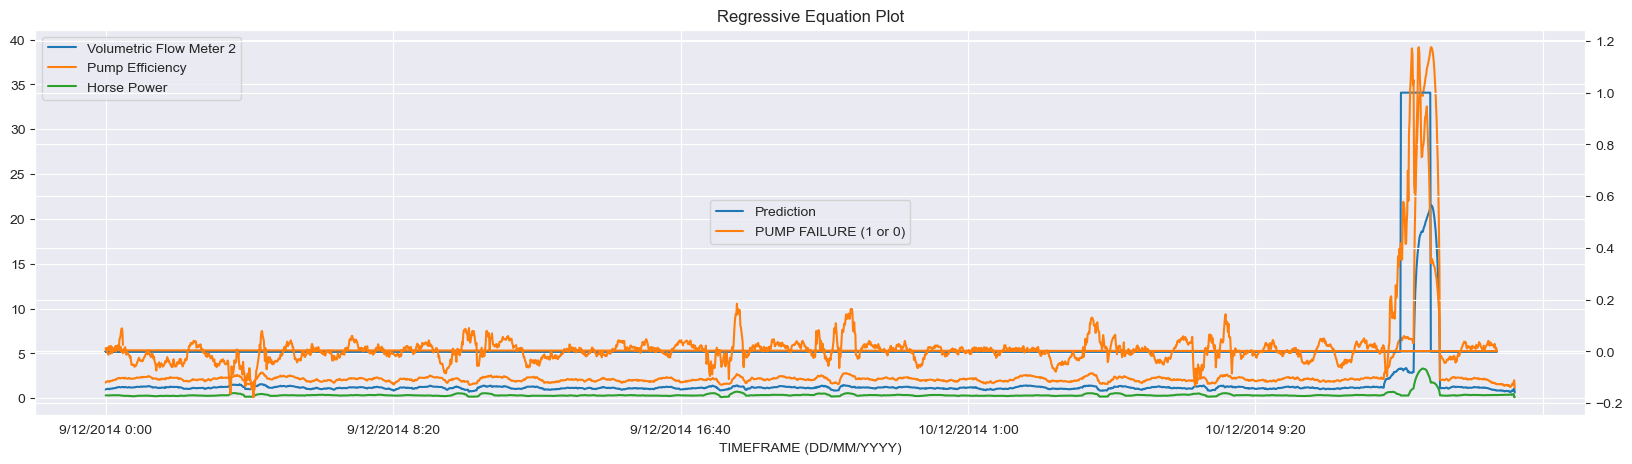

In [374]:
df_stdev['Prediction'] = regression_model.predict(ind_variables)
df_stdev.set_index('TIMEFRAME (DD/MM/YYYY)',inplace=True)
axes1 = ['Volumetric Flow Meter 2','Pump Efficiency','Horse Power']
axes2 = ['PUMP FAILURE (1 or 0)','Prediction']

ax1 = df_stdev[axes1].plot(kind='line')
ax2 = ax1.twinx()
ax2.plot(df_stdev[axes2],label=['Prediction','PUMP FAILURE (1 or 0)'])
ax1.legend()
ax2.legend(loc='center')
plt.title('Regressive Equation Plot')
plt.show()